# Personal Text Analysis with PhoneView, Python and `pandas`



## Preliminary

In [1]:
# Let's first import the phoneview_helper module
# (because it is not installed, but just a floating file in this folder
# we may need to help Python find it, by adding the local directory to
# the PYTHONPATH)

import os, sys
sys.path.append(os.path.abspath("./"))

import phoneview_helper as pvh

In [2]:
# Now let's import pandas, with which we will do the data analysis and plotting
import pandas as pd

## Custom settings

In [3]:
OUTPUT_CAPTION = "example"

COLOR_SENT = (0.427, 0.694, 0.329)               # beautiful green
COLOR_RECEIVED = (0.631, 0.451, 1.0)             # royal purple
CUSTOM_COLORS=[COLOR_RECEIVED, COLOR_SENT]

## Importing the text message data
First, you must export the text messages from your phone to a CSV file. [Instructions on how to do this with PhoneView are available on the repository.](https://github.com/jlumbroso/text-message-analysis-notebook/blob/master/docs/PhoneView.md) Once this is done, you can import the text messages in this notebook using the `phoneview_helper` module you just imported above.

In [4]:
df = pvh.load_csv(filepath="text_messages.csv", keep_type=False)
df.tail(3) # let's take a look at the last three rows

,inbound,length,content
timestamp,,,
2019-06-23 11:49:49,True,59,"They know you are coming and will, i imagine, ..."
2019-06-23 11:50:21,False,12,"OK, perfect."
2019-06-23 12:04:35,False,13,Finally here!


This dataset is provided as a `pandas.DataFrame` object. You can read about [the `DataFrame` type](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), or [a short (but still overwhelming!) intro to `pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

The `phoneview_helper.load_csv()` method has a few parameters you may find useful:

- The `filepath` parameter is the name of the CSV file that was exported from PhoneView.
- The `phone_number` parameter can allow you to filter on a specific phone number, if the dataset exported from PhoneView contains conversations with several other recipients.
- The `keep_type` parameter determines whether (if available) to keep the type of text message, among `SMS`, `iMessage` and `WhatsApp`.
- The `keep_other_number` parameter determines whether to keep the number that of the other sender/recipient.

## Plots

In [5]:
fig = pvh.plot_texts(df, absolute=False, count_or_volume=phoneview_helper.PlotStyle.COUNT, colors=CUSTOM_COLORS)
fig.savefig("{}_relative_text_count.pdf".format(OUTPUT_CAPTION))

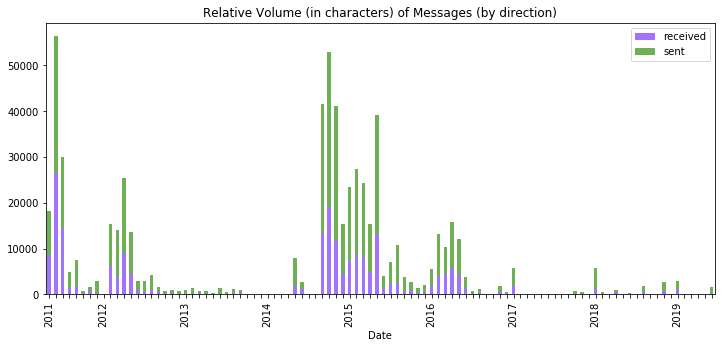

In [6]:
fig = pvh.plot_texts(df, absolute=False, count_or_volume=pvh.PlotStyle.VOLUME, colors=CUSTOM_COLORS)
fig.savefig("{}_relative_text_character_count.pdf".format(OUTPUT_CAPTION))

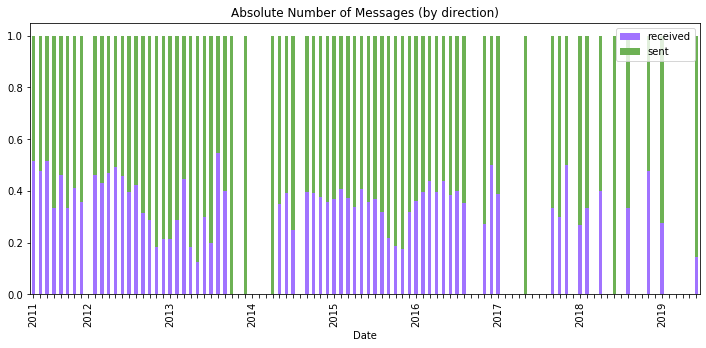

In [7]:
fig = pvh.plot_texts(df, absolute=True, count_or_volume=pvh.PlotStyle.COUNT, colors=CUSTOM_COLORS)
fig.savefig("{}_absolute_text_count.pdf".format(OUTPUT_CAPTION))

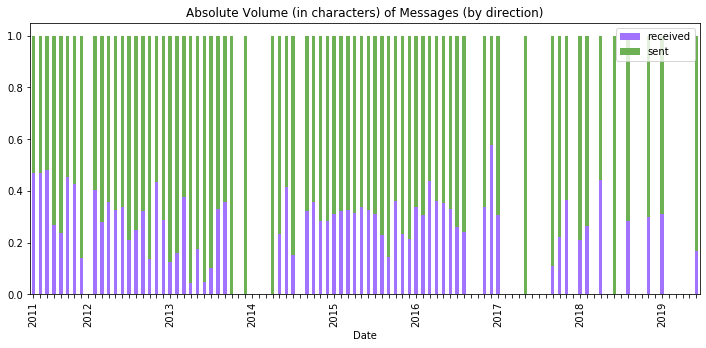

In [8]:
fig = pvh.plot_texts(df, absolute=True, count_or_volume=pvh.PlotStyle.VOLUME, colors=CUSTOM_COLORS)
fig.savefig("{}_absolute_text_character_count.pdf".format(OUTPUT_CAPTION))